In [246]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [247]:
train=pd.read_csv('Downloads/train_ctrUa4K.csv')
test=pd.read_csv('Downloads/test_lAUu6dG.csv')

In [248]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [249]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [250]:
train_original=train.copy()
test_original=test.copy()

In [251]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [252]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [253]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [254]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [255]:
train.shape

(614, 13)

In [256]:
test.shape

(367, 12)

In [257]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

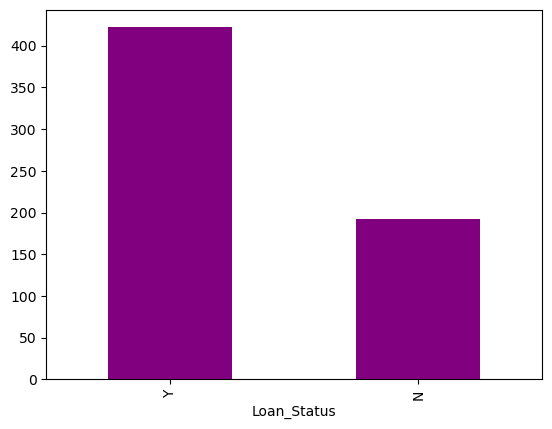

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [258]:
train['Loan_Status'].value_counts().plot.bar(color='purple')
plt.show()
plt.tight_layout

# Around 422 people i.e. 69% out of 614 were approved 

In [260]:
#independent categorical 

In [261]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

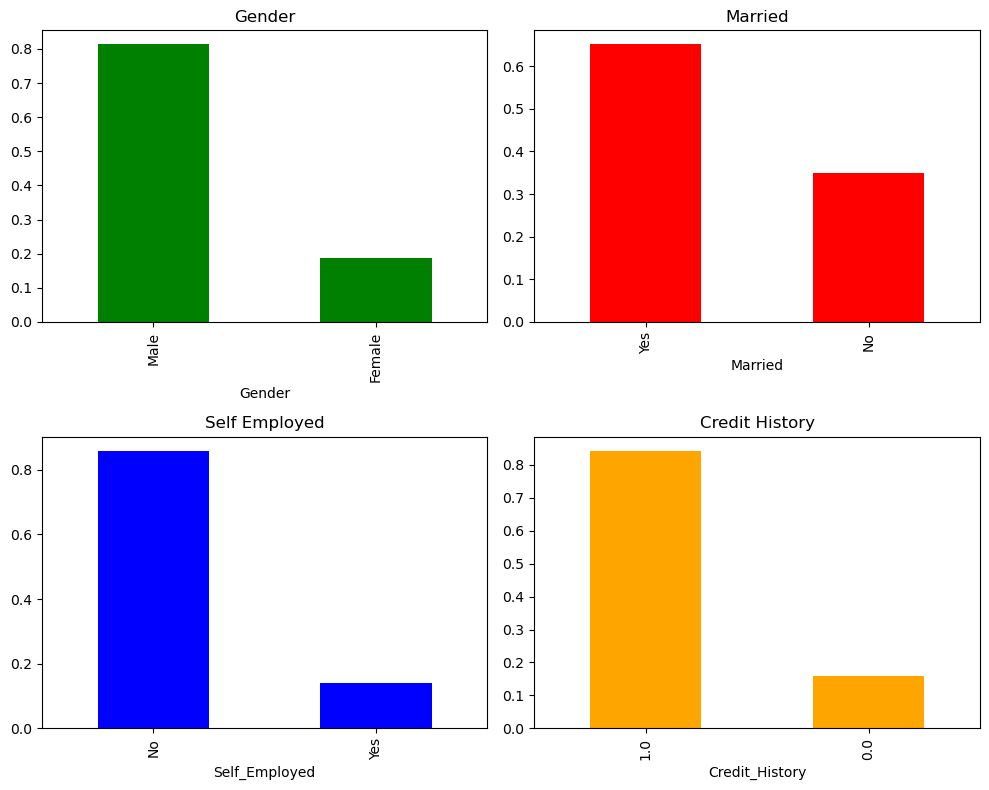

In [262]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)  
train['Gender'].value_counts(normalize=True).plot.bar(color='green', title='Gender')

plt.subplot(2, 2, 2)
train['Married'].value_counts(normalize=True).plot.bar(color='red', title='Married')

plt.subplot(2, 2, 3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(color='blue', title='Self Employed')

plt.subplot(2, 2, 4)
train['Credit_History'].value_counts(normalize=True).plot.bar(color='orange', title='Credit History')

plt.tight_layout()
plt.show()

# 80% applicants are male 
# around 65% applicants are married
# around 15% are self employed
# around 85% have repayed their debts

In [263]:
#independent ordinal
#dependents | properties | Education

In [264]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

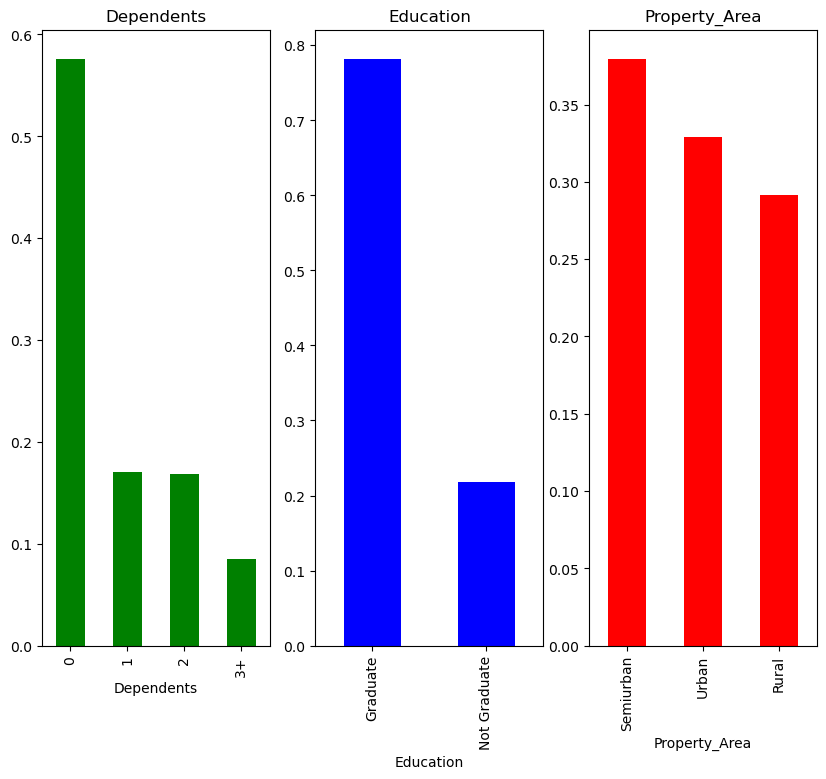

In [265]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)

train['Dependents'].value_counts(normalize=True).plot.bar(color='green', title='Dependents')

plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(color='Blue', title='Education')

plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(color='Red', title='Property_Area')

plt.tight_layout
plt.show()




# Most applicants have no dependants
# Around 80% are graduated 
# Most of the applicants are from semiurban area

In [266]:
#independent variables (Numericals)
# applicant Income

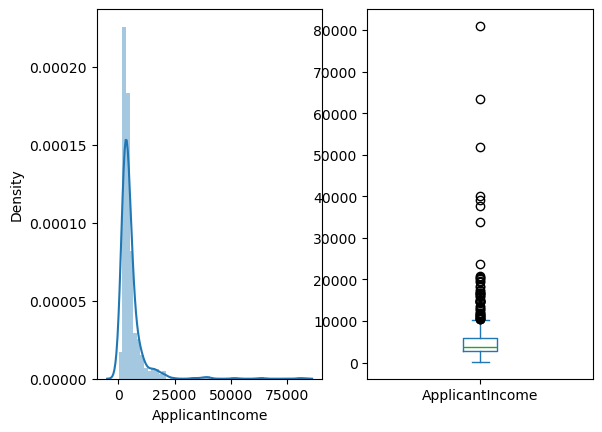

In [267]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])


plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box()


plt.tight_layout
plt.show()

In [268]:
#hence the data is not notmally distributed thus further will work with outliers in the coming section but furtherhand lets first segregate the income based on education

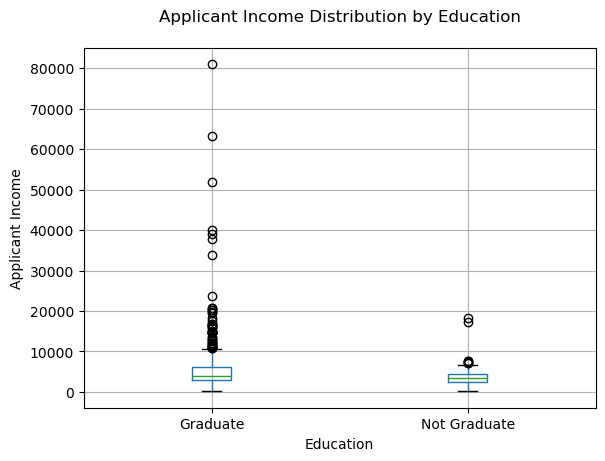

In [269]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('Applicant Income Distribution by Education')  
plt.title('')  
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()


In [270]:
#high number of graduates with high incomes are apperaing to be an outlier

In [271]:
#now lets further see thier co-applicnts income

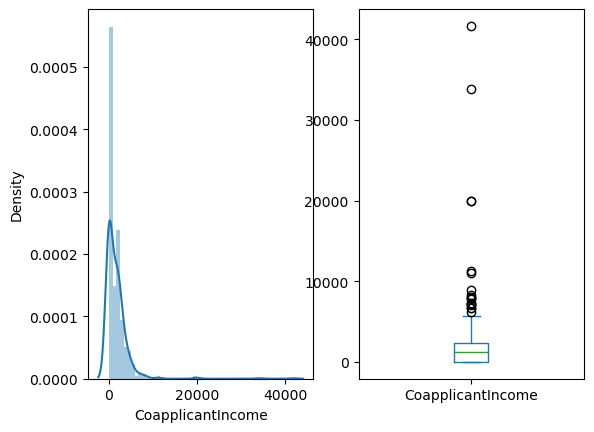

In [272]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])


plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box()


plt.tight_layout
plt.show()

In [273]:
#lets further investigate on loan amount variable

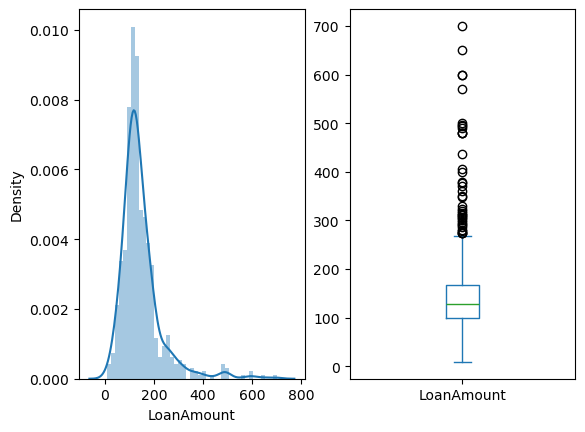

In [274]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])


plt.subplot(1,2,2)
train['LoanAmount'].plot.box()


plt.tight_layout
plt.show()

In [275]:
#as we can detect the outliers in every case thus further will investigate on thi aspects but before lets have a sight on the bivariate analysis 

# Lets recall some of the hypohesis we generated from the above analysis 
1. Applicants with highger income has more chances of approval.
2. Applicants who have repayed thier previous debts should have higher chances of loan approval.
3. Loan Approval should be dependent on the amount, the lesser the amount the better the chances of approval.
4. Lesser the repayment amount per month higher the chances of approval 

In [276]:
#Bivariate Analysis 

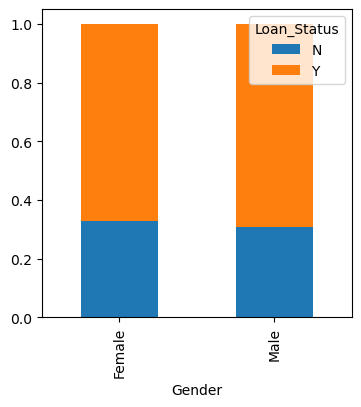

In [277]:
train.groupby('Gender')['Loan_Status'] \
     .value_counts(normalize=True) \
     .unstack() \
     .plot(kind='bar', stacked=True, figsize=(4, 4))
plt.show()

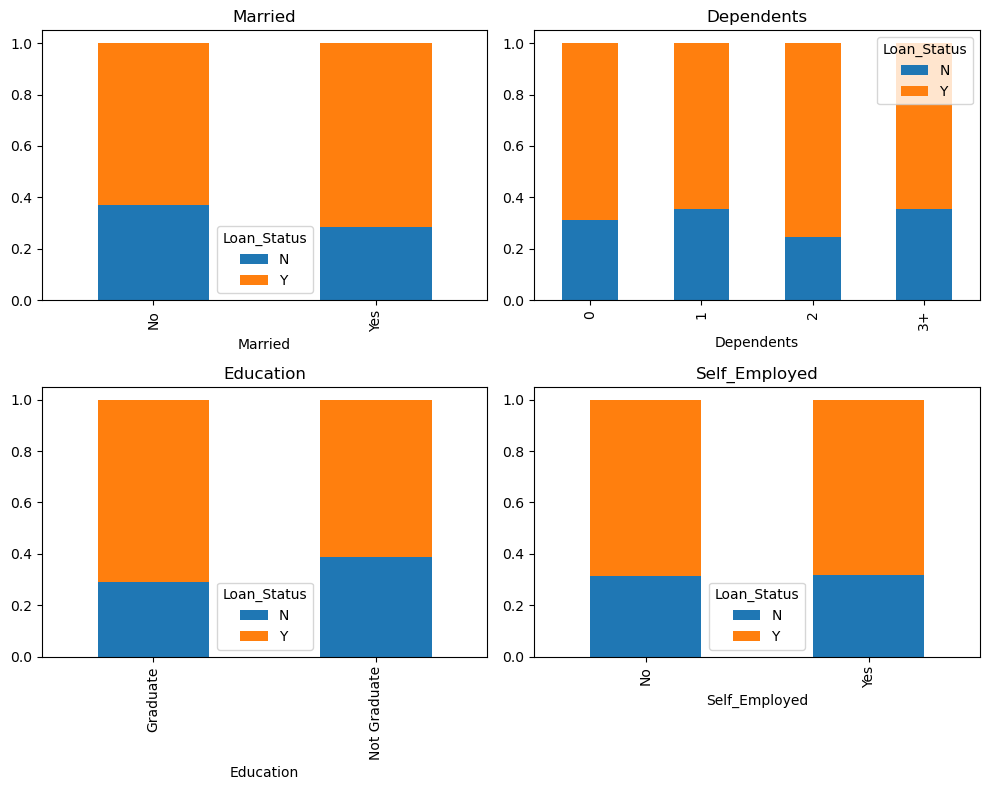

In [278]:
cols = ['Married', 'Dependents', 'Education', 'Self_Employed']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns
axes = axes.flatten()  # make it easier to loop

for i, col in enumerate(cols):
    (train.groupby(col)['Loan_Status']
         .value_counts(normalize=True)
         .unstack()
         .plot(kind='bar', stacked=True, ax=axes[i], title=col))

plt.tight_layout()
plt.show()



1.Portion of Married applicants are highger than unmarried.
2.Distribution of loan_status with all categories of dependants are more over similar. 
3. no significant observation found btw self employed and loan status.

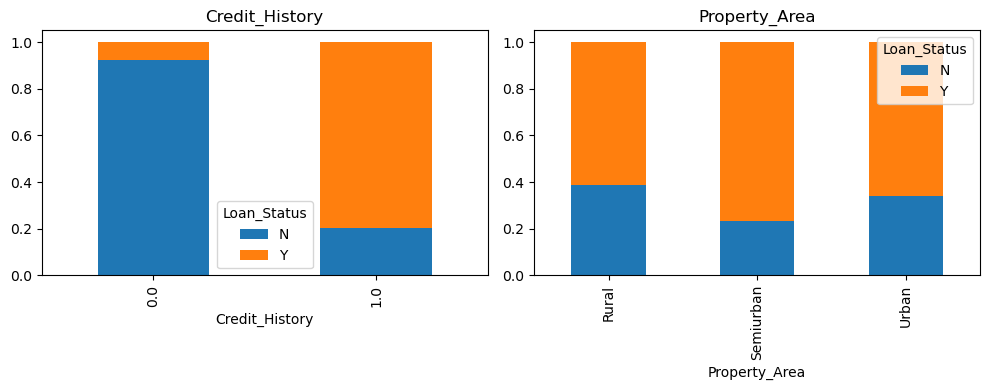

In [279]:
cols = ['Credit_History', 'Property_Area']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  
axes = axes.flatten()

for i, col in enumerate(cols):
    (train.groupby(col)['Loan_Status']
         .value_counts(normalize=True)
         .unstack()
         .plot(kind='bar', stacked=True, ax=axes[i], title=col))

plt.tight_layout()
plt.show()


In [280]:
# Applicants with credit score as 1 is more likely to have a better chance of approvals of loans.
# Portion of Loan Approval at semiurban areas are much more than thatb of rural and urban area.

In [281]:
#mean income of people for which the loans have been approved


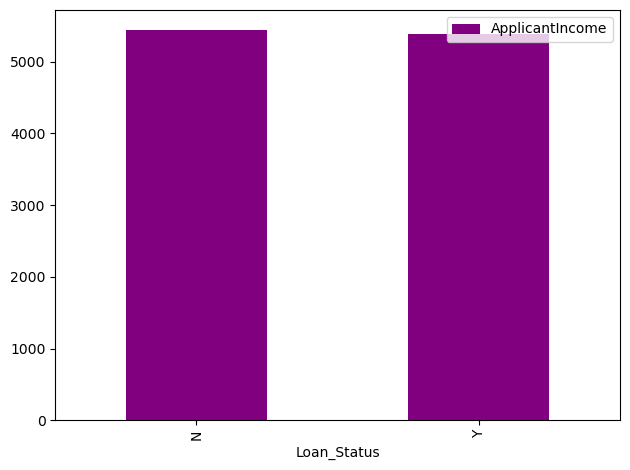

In [282]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color='purple')
plt.legend()
plt.tight_layout()
plt.show()


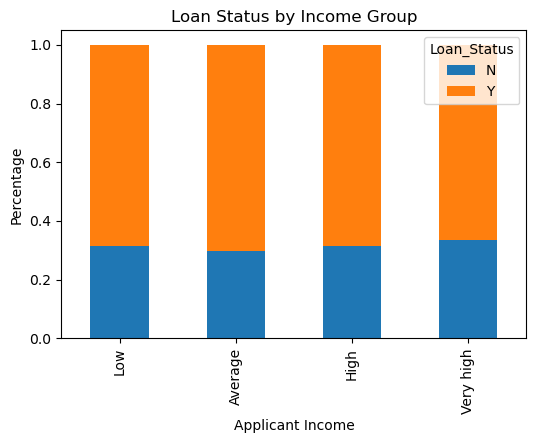

In [283]:
# Define bins and labels
bins = [0, 2500, 4000, 6000, 81000]
labels = ['Low', 'Average', 'High', 'Very high']

# Create Income bin column
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=labels)

# Plot stacked bar
(train.groupby('Income_bin')['Loan_Status']
      .value_counts(normalize=True)
      .unstack()
      .plot(kind='bar', stacked=True, figsize=(6, 4)))

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Income Group')
plt.show()


# Thus it can be inferred that loan approval at low is also similar than that of other bins.
# Therefore our clamied hypothesis which was higher the income , higher the chances of loan approval is false. 

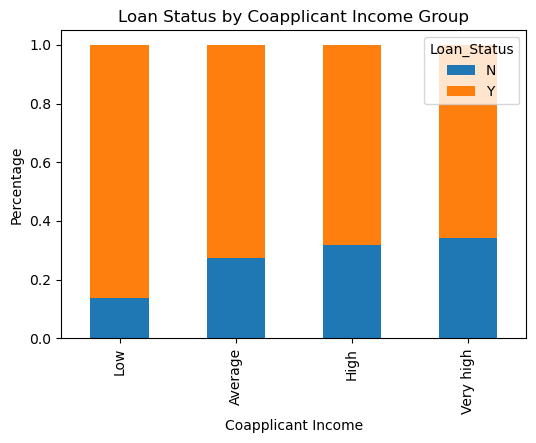

In [284]:
bins = [0, 1000, 3000, 4200, 42000]
labels = ['Low', 'Average', 'High', 'Very high']

# Create Coapplicant income bin column
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=labels)


(train.groupby('Coapplicant_Income_bin')['Loan_Status']
      .value_counts(normalize=True)
      .unstack()
      .plot(kind='bar', stacked=True, figsize=(6, 4)))

plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Coapplicant Income Group')
plt.show()



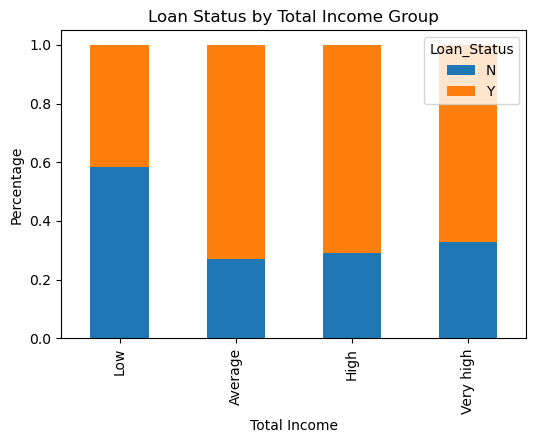

In [285]:
# Create Total Income column
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
labels = ['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=labels)

(train.groupby('Total_Income_bin')['Loan_Status']
      .value_counts(normalize=True)
      .unstack()
      .plot(kind='bar', stacked=True, figsize=(6, 4)))

plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.title('Loan Status by Total Income Group')
plt.show()


In [286]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin'],
      dtype='object')

In [287]:
cols_to_drop = ['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'Total_Income']
train = train.drop(columns=[c for c in cols_to_drop if c in train.columns])
train['Dependents'].replace('3+',3,inplace= True)
test['Dependents'].replace('3+',3,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)

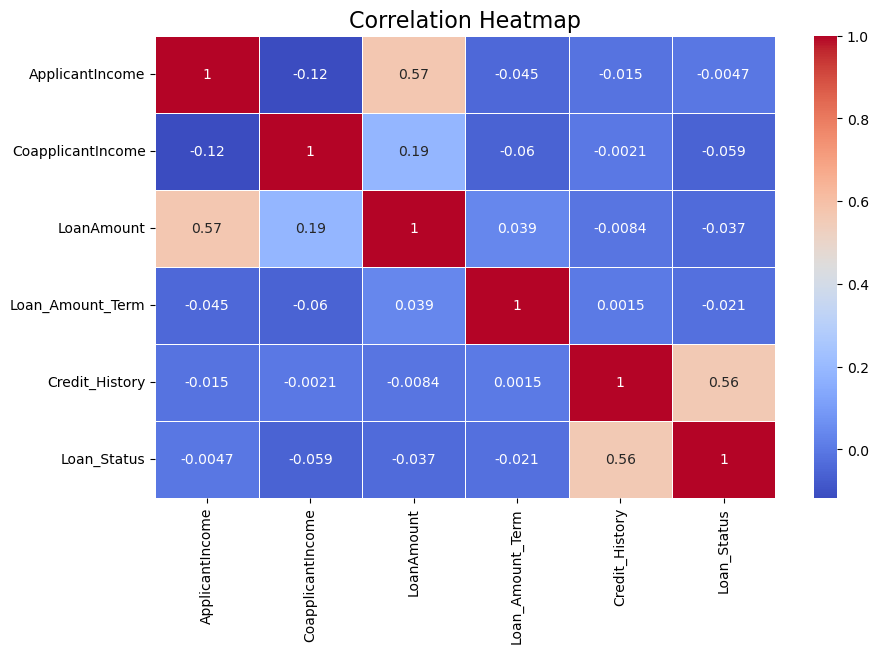

In [288]:
numeric_df = train.select_dtypes(include=['number'])
matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# We see that most corelated variables are Applicant income & loan amount and credit history and loan status also loan amount is also corelated with coapplicants income.

In [289]:
#Missing values and outlier treatment

In [290]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [291]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Gender'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Gender'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Gender'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Gender'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace= True)

In [292]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [293]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Gender'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Gender'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0], inplace= True)
test['Credit_History'].fillna(test['Gender'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)


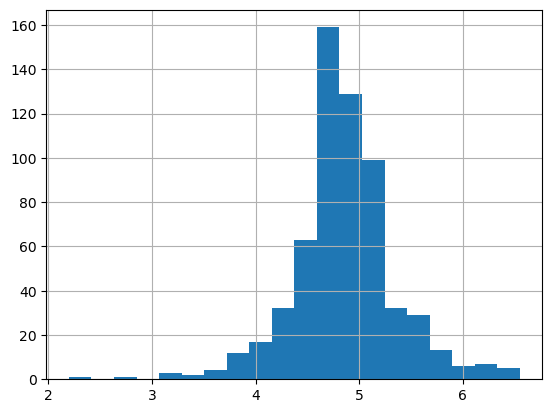

In [294]:
#Log transformation for skewness
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log'] = np.log(test['LoanAmount'])
plt.show()



# Logistic Regression

In [295]:
train.drop(columns='Loan_ID', inplace=True)
test.drop(columns='Loan_ID', inplace=True)


In [296]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']


In [297]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer to handle missing values
# strategy='mean' replaces NaN with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the features
X_imputed = imputer.fit_transform(X)

# Now split the data
x_train, x_cv, y_train, y_cv = train_test_split(X_imputed, y, test_size=0.3, random_state=1)

# Train model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [299]:
pred_cv=model.predict(x_cv)

In [300]:
accuracy_score(y_cv,pred_cv)

0.7891891891891892

# Therefore our prediction model is about 78% accurate so lets make prediction for our test dataset

In [301]:
# Identify missing columns
missing_cols = set(X.columns) - set(test.columns)
print("Missing columns in test data:", missing_cols)

# Add missing columns with default value (e.g., 0)
for col in missing_cols:
    test[col] = 0

# Ensure the same column order as training
test = test[X.columns]

# Predict
pred_test = model.predict(test)


Missing columns in test data: {'Married_Male'}


In [302]:
submission = pd.read_csv('Downloads/sample_submission_49d68Cx.csv')

In [303]:
submission.head(5)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [304]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']


In [305]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [306]:
submission[['Loan_ID', 'Loan_Status']].to_csv('logistic.csv', index=False)


In [309]:
Result=pd.read_csv('logistic.csv')

In [313]:
Result.head(10)


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


# Now lets check how rubust is our model for the unseen data via validation

In [315]:
from sklearn.model_selection import StratifiedKFold  

# NOW LETS MAKE A CROSS VALIDATION LOGISTIC MODEL

In [320]:
imputer = SimpleImputer(strategy='mean')

# Apply imputation to X
X_imputed = imputer.fit_transform(X)

# Initialize cross-validation with 5 folds
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
fold_num = 1  # Counter for current fold

# Iterate through each train-validation split
for train_idx, val_idx in kfold.split(X_imputed, y):
    print(f'\nFold {fold_num} of {kfold.n_splits}')
    
    # Split data into training and validation sets
    X_train, X_val = X_imputed[train_idx], X_imputed[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Train logistic regression model
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, val_pred)
    print(f'Validation accuracy: {acc:.4f}')
    
    fold_num += 1  
    class1_probs = model.predict_proba(X_val)[:, 1]  # Class 1 probabilities


Fold 1 of 5
Validation accuracy: 0.8049

Fold 2 of 5
Validation accuracy: 0.8130

Fold 3 of 5
Validation accuracy: 0.7805

Fold 4 of 5
Validation accuracy: 0.7724

Fold 5 of 5
Validation accuracy: 0.7951


# ACCURACY OF AROUND 80% LETS FURTHER VISUALISE THE ROC CURVE

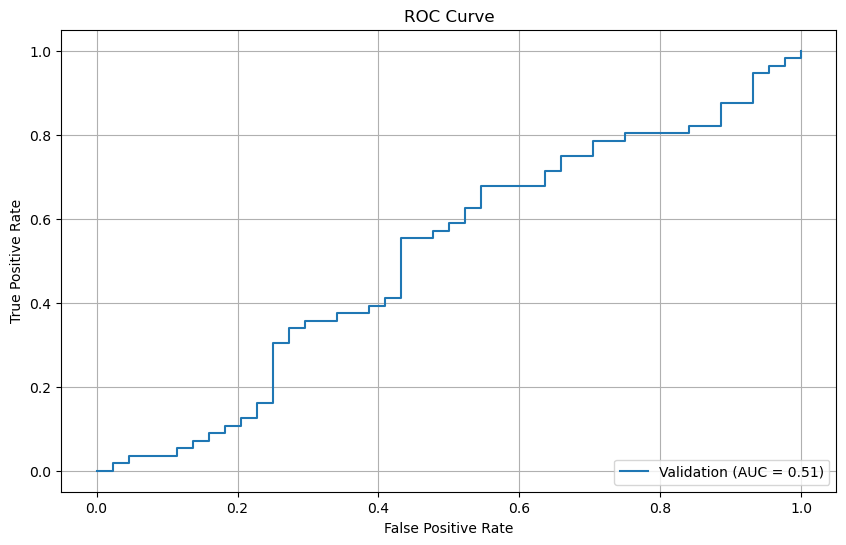

In [328]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# First, define the missing variables
# For example, create some sample data
# In a real scenario, you would load your actual data
np.random.seed(42)
# Create sample true labels (0 or 1)
yv1 = np.random.randint(0, 2, 100)
# Create sample prediction probabilities
pred = np.random.random(100)

# Calculate ROC curve and AUC
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_true=yv1, y_score=pred)
roc_auc = metrics.roc_auc_score(y_true=yv1, y_score=pred)

# Plot the ROC curve
plt.figure(figsize=(10, 6))  # Slightly smaller figure
plt.plot(false_positive_rate, true_positive_rate, 
         label=f'Validation (AUC = {roc_auc:.2f})')  # Formatted AUC to 2 decimals

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')  
plt.legend(loc='lower right')  
plt.grid(True)  
plt.tight_layout
plt.show()

In [329]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [330]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [331]:
submission[['Loan_ID', 'Loan_Status']].to_csv('logistic2.csv', index=False)


In [332]:
submission2=pd.read_csv('logistic2.csv')

In [334]:
submission2.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [1]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34821 sha256=1abe32c0122f4fda12d1fd6c8d5938448759ebc9a21769582f8bf57e8e604e75
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\9c\2f\9f\b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
